Experiment of Convolutional Neural Networks (CNNs) with CIFAR-10 dataset
=========


**Initialisation of the program**

The program starts with the importing of typical Keras and other Python service modules. 

In [99]:
# importing of modules for CIFAR-10 CNN 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

The following constant and variable definitions are needed for the network and training parameters.


In [100]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 20 
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

Constant definition for the training set images

In [101]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

__CIFAR-10 data loading and processing__

Loading and preparation of the CIFAR-10 training set.

In [102]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
 
# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES) 

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

**Visualisation of two sample CIFAR-10 images**

Here we will visualise two sample images from the dataset.

Sample input image: [[[1.         1.         1.        ]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 ...

 [[0.44313726 0.47058824 0.4392157 ]
  [0.43529412 0.4627451  0.43529412]
  [0.4117647  0.4392157  0.41568628]
  ...
  [0.28235295 0.31764707 0.3137255 ]
  [0.28235295 0.3137255  0.30980393]
  [0.28235295 0.3137255  0.30980393]]

 [[0.43529412 0.4627451  0.43137255]
  [0.40784314 0.4

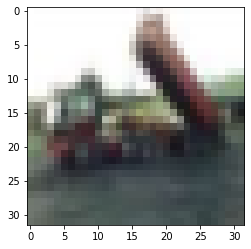

Sample input image: [[[0.10980392 0.09803922 0.03921569]
  [0.14509805 0.13333334 0.07450981]
  [0.14901961 0.13725491 0.07843138]
  ...
  [0.29803923 0.2627451  0.15294118]
  [0.31764707 0.28235295 0.16862746]
  [0.33333334 0.29803923 0.18431373]]

 [[0.12941177 0.10980392 0.05098039]
  [0.13333334 0.11764706 0.05490196]
  [0.1254902  0.10588235 0.04705882]
  ...
  [0.37254903 0.32156864 0.21568628]
  [0.3764706  0.32156864 0.21960784]
  [0.33333334 0.28235295 0.1764706 ]]

 [[0.15294118 0.1254902  0.05882353]
  [0.15686275 0.12941177 0.06666667]
  [0.22352941 0.19607843 0.12941177]
  ...
  [0.3647059  0.29803923 0.20392157]
  [0.41960785 0.34901962 0.25882354]
  [0.37254903 0.3019608  0.21176471]]

 ...

 [[0.3254902  0.28627452 0.20392157]
  [0.34117648 0.3019608  0.21960784]
  [0.32941177 0.2901961  0.20392157]
  ...
  [0.3882353  0.3647059  0.27450982]
  [0.3529412  0.32941177 0.23921569]
  [0.31764707 0.29411766 0.20392157]]

 [[0.34509805 0.28235295 0.2       ]
  [0.3529412  0.2

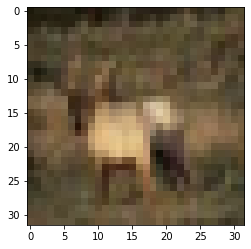

In [103]:
# visualisation of the numerical vector and 2D colour plot of the sample CIFAR imnage 2
Selected_Image = 2
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show() 

Selected_Image = 3
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show() 





**Simple CNN model definition**

This code defines a simple CNN network.
The model will learn 32 convolutional filters, each of a 3 x 3 size. The output dimension is the same one of the input shape, with a 32 x 32 filters (default stride of 1 is used). The activation function ReLU will be used. 
The network then has a max-pooling layer with pool size 2 x 2, and a dropout at 25%.

The next level of depth has a dense layer with 512 units and ReLU activation, followed by a dropout at 50%.
Finally, a softmax layer is used with 10 units/classes as output, i.e. one for each of the 10 classes of objects encoded with one-hot coding.

In [84]:
# network definition

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

print('CNN network definition.')

CNN network definition.


**Model compilation**

This compiles the CNN model, and then shows its summary. 


In [104]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_105 (Activation)  (None, 32, 32, 32)       0         
                                                                 
 conv2d_66 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_106 (Activation)  (None, 32, 32, 32)       0         
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_55 (Dropout)        (None, 16, 16, 32)        0         
                                                     

**Training of the CNN**

This line of code trains the model, saving the results in the history variable.



In [86]:
# training/fitting of the DNN model

history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=20, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Epoch 1/20
313/313 [==============================] - 8s 25ms/step - loss: 2.1779 - accuracy: 0.1940 - val_loss: 2.0060 - val_accuracy: 0.3007
Epoch 2/20
313/313 [==============================] - 8s 25ms/step - loss: 1.9905 - accuracy: 0.2791 - val_loss: 1.8869 - val_accuracy: 0.3418
Epoch 3/20
313/313 [==============================] - 7s 24ms/step - loss: 1.8912 - accuracy: 0.3226 - val_loss: 1.7948 - val_accuracy: 0.3755
Epoch 4/20
313/313 [==============================] - 7s 23ms/step - loss: 1.8163 - accuracy: 0.3519 - val_loss: 1.7279 - val_accuracy: 0.3968
Epoch 5/20
313/313 [==============================] - 7s 24ms/step - loss: 1.7524 - accuracy: 0.3746 - val_loss: 1.6647 - val_accuracy: 0.4183
Epoch 6/20
313/313 [==============================] - 7s 24ms/step - loss: 1.6980 - accuracy: 0.3935 - val_loss: 1.6125 - val_accuracy: 0.4355
Epoch 7/20
313/313 [==============================] - 7s 24ms/step - loss: 1.6528 - accuracy: 0.4081 - val_loss: 1.5699 - val_accuracy: 0.4443

**Saving of the model and of the trained weights**

This saves the model definition and the weights, after training.



In [105]:
#save model in json format into a file
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)

#save the trained weights
model.save_weights('cifar10_weights.h5', overwrite=True)

**Analysis of the results**

This code generates the test scores, so we can visualise and inspect the model's peformance.

It also plots the accuracy and loss values along the training timescale.


79/79 [==============================] - 1s 7ms/step - loss: 1.2666 - accuracy: 0.5546

Test score/loss: 1.2666493654251099
Test accuracy: 0.5546000003814697
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


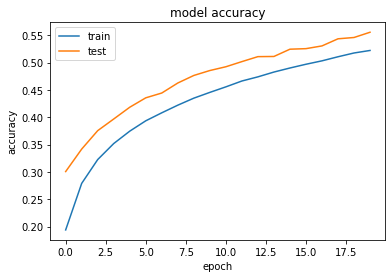

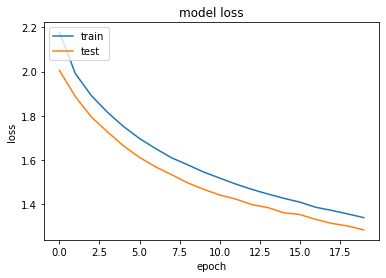

In [87]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


A deeper CNN
-------------
The model under is without batch normalisation 

In [96]:
N_EPOCH = 50 

model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


OPTIM = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer= OPTIM, metrics=['accuracy'])

The model under is with batch normalisation 

In [106]:
N_EPOCH = 50 

model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


OPTIM = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer= OPTIM, metrics=['accuracy'])

# model.summary()

**Training of the deeper CNN**

Let's train (fit) this new model.



In [97]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=50, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Epoch 1/50
313/313 [==============================] - 25s 78ms/step - loss: 2.1650 - accuracy: 0.1832 - val_loss: 2.0153 - val_accuracy: 0.2551
Epoch 2/50
313/313 [==============================] - 24s 76ms/step - loss: 1.9156 - accuracy: 0.2776 - val_loss: 1.7316 - val_accuracy: 0.3542
Epoch 3/50
313/313 [==============================] - 24s 77ms/step - loss: 1.7252 - accuracy: 0.3556 - val_loss: 1.5883 - val_accuracy: 0.4098
Epoch 4/50
313/313 [==============================] - 24s 77ms/step - loss: 1.5833 - accuracy: 0.4063 - val_loss: 1.4769 - val_accuracy: 0.4586
Epoch 5/50
313/313 [==============================] - 24s 77ms/step - loss: 1.4927 - accuracy: 0.4470 - val_loss: 1.3591 - val_accuracy: 0.5025
Epoch 6/50
313/313 [==============================] - 23s 75ms/step - loss: 1.4193 - accuracy: 0.4782 - val_loss: 1.3519 - val_accuracy: 0.5206
Epoch 7/50
313/313 [==============================] - 24s 76ms/step - loss: 1.3515 - accuracy: 0.5060 - val_loss: 1.2217 - val_accuracy:

**Analysis of the Deeper CNN results**

This generates the test scores and plots for the new, deeper DNN.


79/79 [==============================] - 2s 21ms/step - loss: 0.7628 - accuracy: 0.7396

Test score/loss: 0.762792706489563
Test accuracy: 0.7396000027656555
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


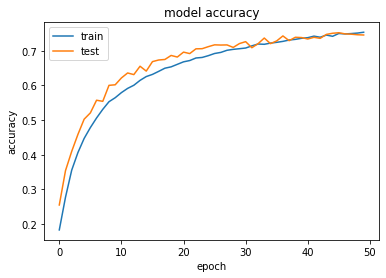

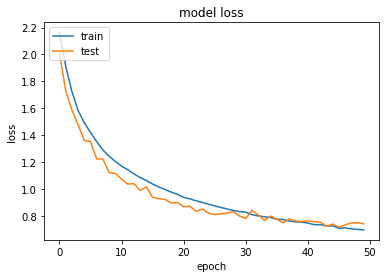

In [98]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()